<a href="https://colab.research.google.com/github/ShunsukeT15/hyousiki/blob/main/Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [29]:
%run prepare_images.py datasets/mydata

Copied images from datasets/mydata/stop
Copied images from datasets/mydata/no_entry
Copied images from datasets/mydata/warning
Copied images from datasets/mydata/ramen


<Figure size 432x288 with 0 Axes>

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.7.0
class number=4
['no_entry', 'ramen', 'stop', 'warning']


Found 191 images belonging to 4 classes.
Found 50 images belonging to 4 classes.
## Train Data Sample ##


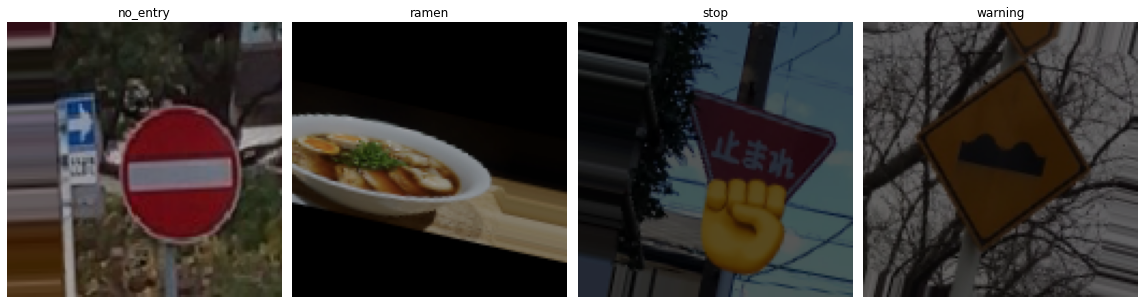

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 128, 8)       224       
                                                                 
 activation_21 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 8)       584       
                                                                 
 activation_22 (Activation)  (None, 126, 126, 8)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 8)       584       
                                                                 
 activation_23 (Activation)  (None, 124, 124, 8)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 8)      

In [31]:
# 学習率
LEARNING_RATE = 0.0005
# エポック（世代数）
EPOCHS = 100
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 128

#train_data_gen = ImageDataGenerator(rescale=1./255)
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=15,width_shift_range=0.3,brightness_range=[0.3, 1.0])
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=60,channel_shift_range=5.,brightness_range=[0.3, 1.0],zoom_range=0.5,horizontal_flip=0.3,vertical_flip=0.3)
val_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=15)
#val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.734 0.263 0.002]
 [0.772 0.227 0.001]
 [0.541 0.443 0.016]
 [0.926 0.074 0.   ]
 [0.913 0.087 0.   ]
 [0.02  0.977 0.003]
 [0.077 0.923 0.   ]
 [0.882 0.117 0.   ]
 [0.062 0.932 0.007]
 [0.079 0.617 0.304]
 [0.116 0.882 0.002]
 [0.863 0.137 0.   ]
 [0.183 0.815 0.002]
 [0.018 0.982 0.   ]
 [0.    1.    0.   ]
 [0.65  0.35  0.   ]
 [0.028 0.972 0.   ]
 [0.008 0.992 0.   ]
 [0.136 0.86  0.004]
 [0.037 0.963 0.   ]
 [0.042 0.958 0.   ]
 [0.016 0.983 0.   ]
 [0.023 0.977 0.   ]
 [0.    0.071 0.929]
 [0.001 0.999 0.   ]
 [0.055 0.944 0.   ]
 [0.924 0.076 0.   ]
 [0.001 0.033 0.966]
 [0.002 0.024 0.974]
 [0.015 0.159 0.825]
 [0.    0.002 0.998]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.009 0.068 0.922]
 [0.    0.    1.   ]
 [0.    0.    1.   ]]
(37, 3)
#0 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895209.jpg
Each Prediction Value: [0.734 0.263 0.002]
* Correct *
#1 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53895215

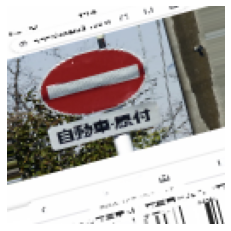

#6 Expected:no_entry -> Predicted:stop
File: no_entry/S__53919761.jpg
Each Prediction Value: [0.077 0.923 0.   ]
**** INCORRECT ****


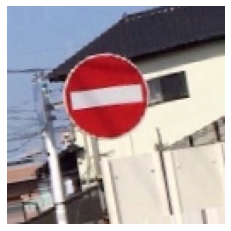

#7 Expected:no_entry -> Predicted:no_entry
File: no_entry/S__53919764.jpg
Each Prediction Value: [0.882 0.117 0.   ]
* Correct *
#8 Expected:stop -> Predicted:stop
File: stop/S__54026283.jpg
Each Prediction Value: [0.062 0.932 0.007]
* Correct *
#9 Expected:stop -> Predicted:stop
File: stop/S__54026284.jpg
Each Prediction Value: [0.079 0.617 0.304]
* Correct *
#10 Expected:stop -> Predicted:stop
File: stop/S__54091794.jpg
Each Prediction Value: [0.116 0.882 0.002]
* Correct *
#11 Expected:stop -> Predicted:no_entry
File: stop/S__54132744.jpg
Each Prediction Value: [0.863 0.137 0.   ]
**** INCORRECT ****


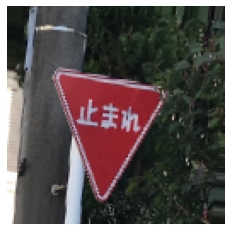

#12 Expected:stop -> Predicted:stop
File: stop/S__54132746.jpg
Each Prediction Value: [0.183 0.815 0.002]
* Correct *
#13 Expected:stop -> Predicted:stop
File: stop/S__54132751.jpg
Each Prediction Value: [0.018 0.982 0.   ]
* Correct *
#14 Expected:stop -> Predicted:stop
File: stop/S__54132752.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#15 Expected:stop -> Predicted:no_entry
File: stop/S__54132766.jpg
Each Prediction Value: [0.65 0.35 0.  ]
**** INCORRECT ****


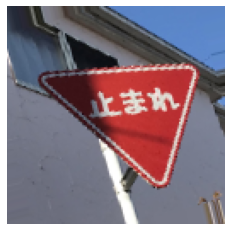

#16 Expected:stop -> Predicted:stop
File: stop/S__54132767.jpg
Each Prediction Value: [0.028 0.972 0.   ]
* Correct *
#17 Expected:stop -> Predicted:stop
File: stop/S__54132768.jpg
Each Prediction Value: [0.008 0.992 0.   ]
* Correct *
#18 Expected:stop -> Predicted:stop
File: stop/S__54132772.jpg
Each Prediction Value: [0.136 0.86  0.004]
* Correct *
#19 Expected:stop -> Predicted:stop
File: stop/S__54132780.jpg
Each Prediction Value: [0.037 0.963 0.   ]
* Correct *
#20 Expected:stop -> Predicted:stop
File: stop/S__54132783.jpg
Each Prediction Value: [0.042 0.958 0.   ]
* Correct *
#21 Expected:stop -> Predicted:stop
File: stop/S__54132785.jpg
Each Prediction Value: [0.016 0.983 0.   ]
* Correct *
#22 Expected:stop -> Predicted:stop
File: stop/S__54149124.jpg
Each Prediction Value: [0.023 0.977 0.   ]
* Correct *
#23 Expected:stop -> Predicted:warning
File: stop/S__54149125.jpg
Each Prediction Value: [0.    0.071 0.929]
**** INCORRECT ****


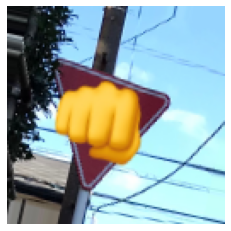

#24 Expected:stop -> Predicted:stop
File: stop/止まれ13.jpg
Each Prediction Value: [0.001 0.999 0.   ]
* Correct *
#25 Expected:stop -> Predicted:stop
File: stop/止まれ8.jpg
Each Prediction Value: [0.055 0.944 0.   ]
* Correct *
#26 Expected:stop -> Predicted:no_entry
File: stop/止まれ9.jpg
Each Prediction Value: [0.924 0.076 0.   ]
**** INCORRECT ****


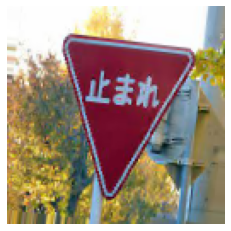

#27 Expected:warning -> Predicted:warning
File: warning/S__54026300.jpg
Each Prediction Value: [0.001 0.033 0.966]
* Correct *
#28 Expected:warning -> Predicted:warning
File: warning/S__54026306.jpg
Each Prediction Value: [0.002 0.024 0.974]
* Correct *
#29 Expected:warning -> Predicted:warning
File: warning/S__54140932.jpg
Each Prediction Value: [0.015 0.159 0.825]
* Correct *
#30 Expected:warning -> Predicted:warning
File: warning/S__54140935.jpg
Each Prediction Value: [0.    0.002 0.998]
* Correct *
#31 Expected:warning -> Predicted:warning
File: warning/keikai1.png
Each Prediction Value: [0. 0. 1.]
* Correct *
#32 Expected:warning -> Predicted:warning
File: warning/keikai22.png
Each Prediction Value: [0. 0. 1.]
* Correct *
#33 Expected:warning -> Predicted:warning
File: warning/keikai26.png
Each Prediction Value: [0. 0. 1.]
* Correct *
#34 Expected:warning -> Predicted:warning
File: warning/keikai29.jpg
Each Prediction Value: [0.009 0.068 0.922]
* Correct *
#35 Expected:warning -> 

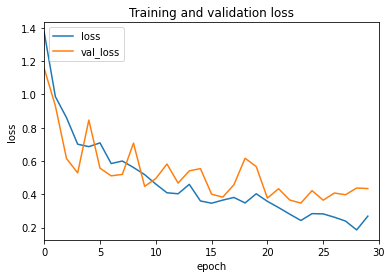

Accuracy


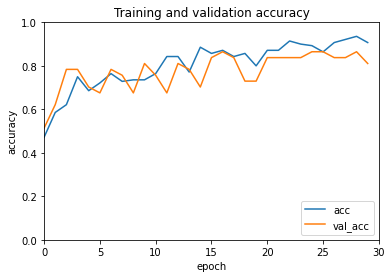

Confusion Matrix


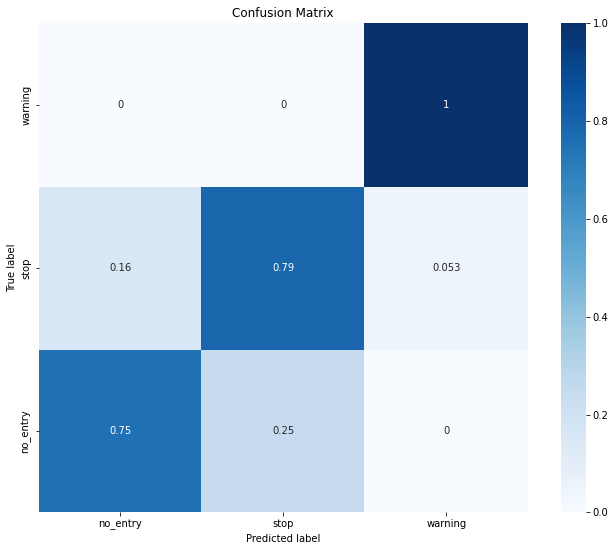

In [11]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d_7


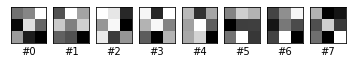

Visualize filter: conv2d_8


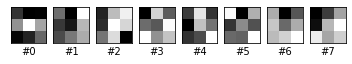

In [15]:
visualize.vis_filter(model, 'conv2d_7')
visualize.vis_filter(model, 'conv2d_8')

In [13]:
!cat incorrect.txt

target_datasets/val/no_entry/S__53919759.jpg
target_datasets/val/no_entry/S__53919761.jpg
target_datasets/val/stop/S__54132744.jpg
target_datasets/val/stop/S__54132766.jpg
target_datasets/val/stop/S__54149125.jpg
target_datasets/val/stop/止まれ9.jpg


In [14]:
!cat correct.txt

target_datasets/val/no_entry/S__53895209.jpg
target_datasets/val/no_entry/S__53895215.jpg
target_datasets/val/no_entry/S__53895220.jpg
target_datasets/val/no_entry/S__53895224.jpg
target_datasets/val/no_entry/S__53919756.jpg
target_datasets/val/no_entry/S__53919764.jpg
target_datasets/val/stop/S__54026283.jpg
target_datasets/val/stop/S__54026284.jpg
target_datasets/val/stop/S__54091794.jpg
target_datasets/val/stop/S__54132746.jpg
target_datasets/val/stop/S__54132751.jpg
target_datasets/val/stop/S__54132752.jpg
target_datasets/val/stop/S__54132767.jpg
target_datasets/val/stop/S__54132768.jpg
target_datasets/val/stop/S__54132772.jpg
target_datasets/val/stop/S__54132780.jpg
target_datasets/val/stop/S__54132783.jpg
target_datasets/val/stop/S__54132785.jpg
target_datasets/val/stop/S__54149124.jpg
target_datasets/val/stop/止まれ13.jpg
target_datasets/val/stop/止まれ8.jpg
target_datasets/val/warning/S__54026300.jpg
target_datasets/val/warning/S__54026306.jpg
target_datasets/val/warning/S__54140932.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       224       
                                                                 
 activation_13 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 8)       584       
                                                                 
 activation_14 (Activation)  (None, 126, 126, 8)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 8)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 31752)             0         
                                                      

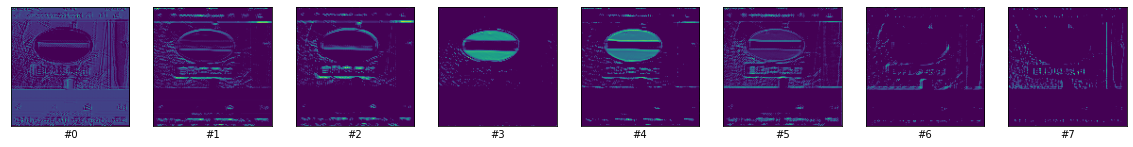

target_datasets/val/no_entry/S__53919761.jpg


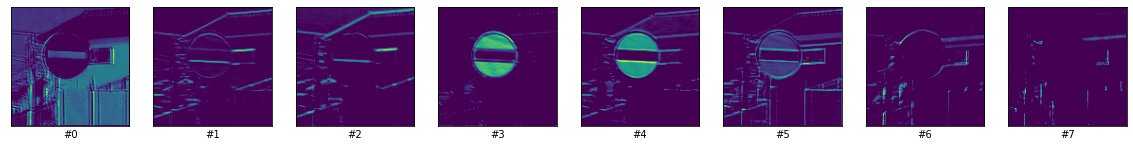

target_datasets/val/stop/S__54132744.jpg


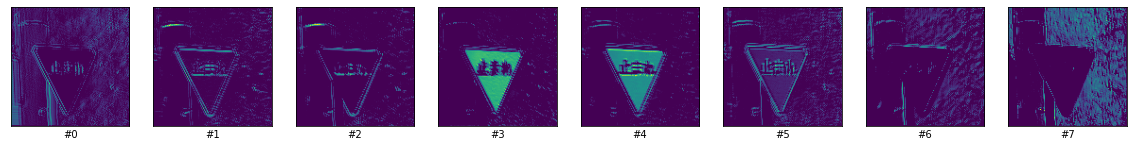

target_datasets/val/stop/S__54132766.jpg


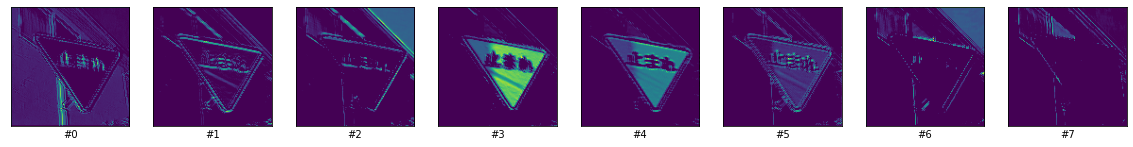

target_datasets/val/stop/S__54149125.jpg


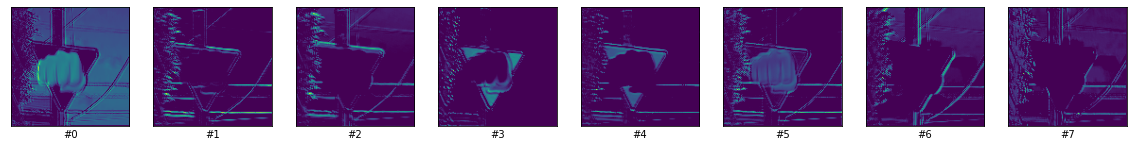

target_datasets/val/stop/止まれ9.jpg


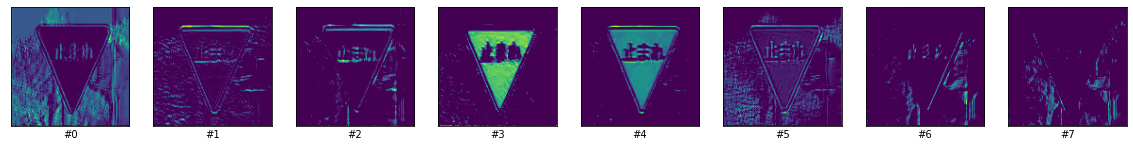

In [18]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_14', IMAGE_SIZE)